In [1]:
import numpy as np
import matplotlib.pyplot as plt

class RegressionModel:
    def __init__(self, X, Y):
        # Add a constant 1 column for the intercept term
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Store the response matrix
        self.Y = Y
        
        # Initialize parameter matrix with zeros
        self.B = np.zeros((self.X.shape[1], self.Y.shape[1] if len(self.Y.shape) > 1 else 1))
        
        # Initialize the loss attribute
        self.loss = np.array([])

    # Function to plot the loss
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss over iterations')
        plt.show()

In [2]:
class LinearRegressionModel(RegressionModel):
    def __init__(self, X, Y):
        # Call the parent class initializer to inherit its properties
        super().__init__(X, Y)

    # Function to perform gradient descent
    def gradient_descent(self, alpha, n_iterations):
        m = self.Y.shape[0]  # Number of samples
        MSE = np.zeros(n_iterations)  # Array to store MSE at each epoch
        
        for epoch in range(n_iterations):
            # Compute the gradient and update the parameters
            self.B += alpha * self.X.T @ (self.Y - self.X @ self.B)
            
            # Compute the MSE for the current iteration
            MSE[epoch] = (1 / (self.Y.shape[1] * m)) * np.sum((self.Y - (self.X @ self.B))**2)
        
        # Append the MSE values to the loss attribute in the parent class
        self.loss = np.append(self.loss, MSE)

In [3]:
# Logistic Regression Model (inherits from RegressionModel)
class LogisticRegressionModel(RegressionModel):
    def __init__(self, X, Y):
        # Call the parent class initializer to inherit its properties
        super().__init__(X, Y)

    # Softmax function to convert logits to probabilities
    def softmax(self, logits):
        exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Numerical stability
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Function to perform gradient descent for logistic regression
    def gradient_descent(self, alpha, n_iterations):
        neg_log_likelihood = np.zeros(n_iterations)  # Array to store NLL at each epoch
        
        for epoch in range(n_iterations):
            # Step 1: Compute logits (Z = X @ B)
            logits = self.X @ self.B
            
            # Step 2: Apply softmax to compute the predicted probabilities
            P = self.softmax(logits)
            
            # Step 3: Compute the gradient (X.T @ (Y - P))
            gradient = self.X.T @ (self.Y - P)
            
            # Step 4: Update the parameters (B += learning_rate * gradient)
            self.B += alpha * gradient

            # Step 5: Compute the negative log-likelihood (cross-entropy loss)
            neg_log_likelihood[epoch] = -np.sum(self.Y * np.log(P + 1e-9)) / self.Y.shape[0]  # Adding epsilon for numerical stability
        
        # Store the NLL loss after all iterations
        self.loss = np.append(self.loss, neg_log_likelihood)

Shape of X: (7384, 3)
Shape of Y: (7384, 2)


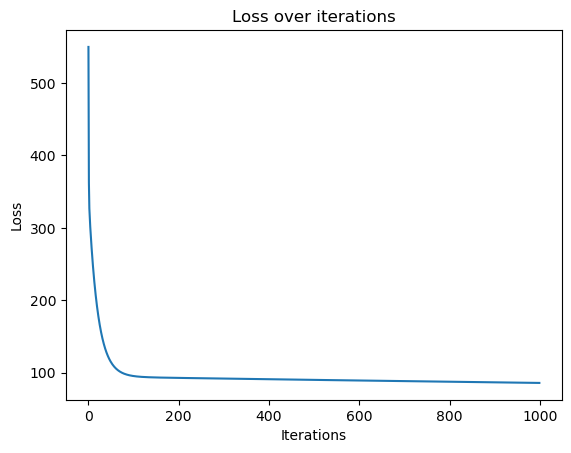

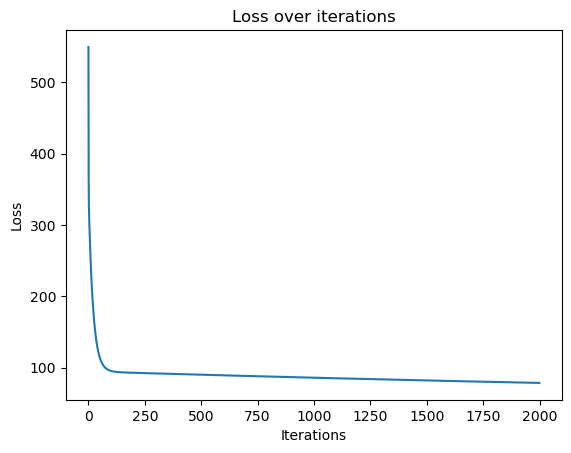

In [4]:
#########################HOMEWORK 1#########################

# Load the data for Homework 1 Problem 3
data = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/gt_data/gt_2015.csv', skip_header=1, delimiter=',', usecols=(0, 3, 8, 9, 10))

# Clean the data (remove rows with missing values)
data_clean = data

# Extract the response variables (Y): CO (column 3) and NOx (column 4)
Y = data_clean[:, [3, 4]]

# Extract the predictor variables (X) and add a column of ones for the intercept
X = data_clean[:, [0, 1, 2]]

# Print shapes to verify
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Test the LinearRegressionModel class

# Initialize the LinearRegressionModel
lin_model = LinearRegressionModel(X, Y)

# Perform 1,000 epochs of gradient descent with learning rate 1e-4
lin_model.gradient_descent(alpha=17e-8, n_iterations=1000)

# Plot the loss after 1,000 epochs
lin_model.plot_loss()

# Perform an additional 1,000 epochs of gradient descent
lin_model.gradient_descent(alpha=17e-8, n_iterations=1000)

# Plot the loss after 2,000 total epochs
lin_model.plot_loss()


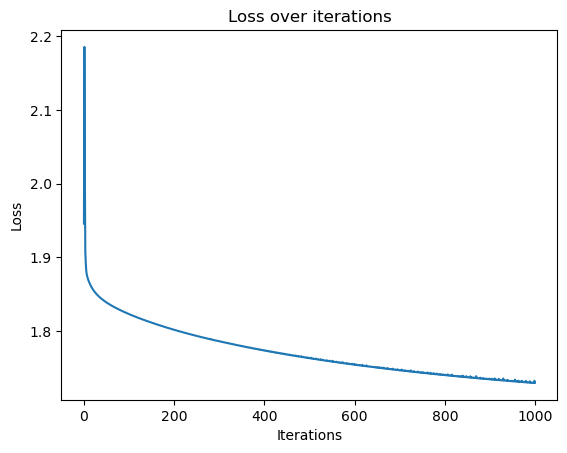

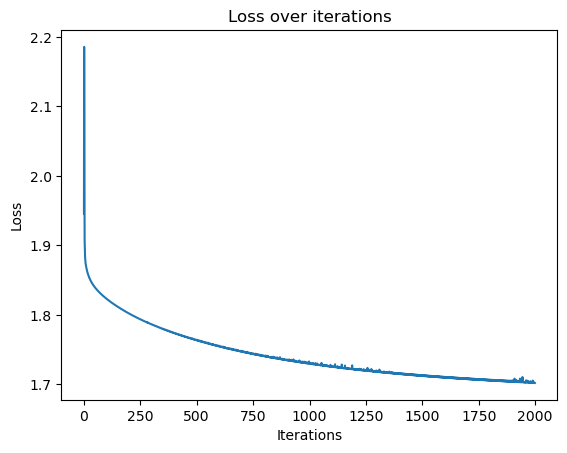

In [5]:
#########################HOMEWORK 3#########################
# Load the segmentation dataset
labels = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Image/segmentation.data', 
                       delimiter=',', dtype=str, encoding=None, usecols=0, skip_header=6)

# Load the feature columns
features = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Image/segmentation.data', 
                         delimiter=',', dtype=float, encoding=None, usecols=(5, 6, 7, 8, 9), skip_header=6)

# One-hot encode the class labels
unique_classes = np.unique(labels)  # Get the unique class names
num_classes = len(unique_classes)

# Create a one-hot encoded matrix for the labels
Y = np.zeros((labels.shape[0], num_classes))
for i, label in enumerate(labels):
    Y[i, np.where(unique_classes == label)[0][0]] = 1

# Set X to be the feature matrix (already loaded above as 'features')
X = features

# Test the LogisticRegressionModel class

# Initialize the LogisticRegressionModel
log_model = LogisticRegressionModel(X, Y)

# Perform 1,000 epochs of gradient descent with learning rate 1e-4
log_model.gradient_descent(alpha=1e-4, n_iterations=1000)

# Plot the loss after 1,000 epochs
log_model.plot_loss()

# Perform an additional 1,000 epochs of gradient descent
log_model.gradient_descent(alpha=1e-4, n_iterations=1000)

# Plot the loss after 2,000 total epochs
log_model.plot_loss()